This calculator is designed to calculate the optimal investment strategy over time, comparing home equity growth vs. investment growth.

Many wild assumptions ahead, but hopefully at least the math is correct.

We should also answer a couple of questions, like:
Should you pay your mortgage as quickly as possible, or invest additional available income instead?

Should make it so that you can start at a later year. Plots over a variety of values

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Some important variables:
note: do we also want to consider their uncertainty?
We probably want to separate these into their own cells, each with sources/derivation

Also: compare rental costs?

All of these are per year costs, except for a couple which are one time costs

In [19]:
initial_savings = 50000 #amount available to spend in year 0
home_cost = 200000 #cost of a home
yearly_surplus = 5000 #amount set aside for investment
expected_interest_rate = 3.5 #assumed average interest rate per year
expected_inflation_rate = 3 #assumed average inflation per year
expected_investment_growth_rate = 7.5 #expected growth rate per year for investments
expected_home_equity_growth_rate = 7.5 #expected growth in value of home per year
home_purchase_costs = 5000 #costs of buying a home
#home_maintainance_costs = 1000 #average amount spend per year on home 
#capital_gains_tax = 5 #tax rate on contributions over tax free amount?
#property_tax = 2 #tax rate for property
down_payment = 20 #percentage of home you pay initially
prime = 1
mortgage_rate = expected_interest_rate + prime # Should we assume rental income = mortgage here? 
#can maintainance costs be ommitted then too?
yearly_invested = yearly_surplus #could be a percentage; extra goes to mortgage
years = 30
years_arr = np.arange(0,years)
mortgage_years = 30

The cost of home ownership per year: TODO should this really be an additional factor? Assuming a house is purchaced, it's kind of a fixed cost.

Mortgage payments are calculated as the mortgage rate $\times$ outstanding debt

Here we calculate the mortgage payments for each year, assuming a fixed rate mortgage with the interest rate defined above

In [20]:
principal = home_cost - down_payment
yearly_mortgage_payment = principal * ( (expected_interest_rate / 100) * np.power(1 + expected_interest_rate / 100, mortgage_years) / (np.power(1 + expected_interest_rate / 100, mortgage_years) - 1))
mortgage_payments = mortgage_rate * years_arr

Home equity: home value increases per year, home equity grows with home value and with decreased debt due to mortgage payments

In [21]:
home_value = home_cost*np.power(1+(expected_home_equity_growth_rate-expected_inflation_rate)/100,years_arr)
debt = (home_cost - down_payment) - mortgage_payments
home_equity_value = home_value - debt

In [22]:
print home_equity_value

[2.00000000e+01 9.02450000e+03 1.84340000e+04 2.82667250e+04
 3.85417201e+04 4.92788875e+04 6.04990250e+04 7.22238661e+04
 8.44761226e+04 9.72795281e+04 1.10658884e+05 1.24640109e+05
 1.39250287e+05 1.54517719e+05 1.70471984e+05 1.87143989e+05
 2.04566031e+05 2.22771862e+05 2.41796753e+05 2.61677562e+05
 2.82452805e+05 3.04162731e+05 3.26849402e+05 3.50556770e+05
 3.75330767e+05 4.01219391e+05 4.28272801e+05 4.56543412e+05
 4.86085999e+05 5.16957798e+05]


Text(0.5,0,'years')

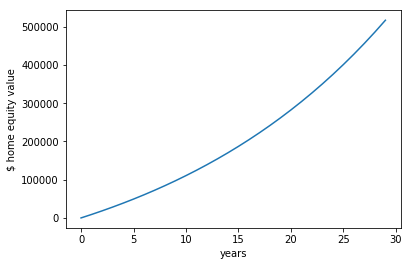

In [23]:
plt.plot(years_arr,home_equity_value)
plt.ylabel("$ home equity value")
plt.xlabel("years")

Value of investments:

In [24]:
initial_investment = initial_savings - home_cost * down_payment / 100 - home_purchase_costs

In [25]:
print initial_investment

5000


In [26]:
print years_arr
print yearly_invested * np.power(1+(expected_investment_growth_rate-expected_inflation_rate)/100,years_arr)
sum = np.cumsum(yearly_invested*np.power(1+(expected_investment_growth_rate-expected_inflation_rate)/100,years_arr)) 
print sum

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[ 5000.          5225.          5460.125       5705.830625
  5962.59300312  6230.90968827  6511.30062424  6804.30915233
  7110.50306418  7430.47570207  7764.84710866  8114.26522855
  8479.40716384  8860.98048621  9259.72460809  9676.41221546
 10111.85076515 10566.88404958 11042.39383181 11539.30155425
 12058.57012419 12601.20577978 13168.26003987 13760.83174166
 14380.06917003 15027.17228269 15703.39503541 16410.047812
 17148.49996354 17920.1824619 ]
[  5000.          10225.          15685.125       21390.955625
  27353.54862812  33584.45831639  40095.75894063  46900.06809296
  54010.57115714  61441.04685921  69205.89396788  77320.15919643
  85799.56636027  94660.54684648 103920.27145457 113596.68367003
 123708.53443518 134275.41848476 145317.81231658 156857.11387082
 168915.68399501 181516.88977479 194685.14981465 208445.98155631
 222826.05072634 237853.22300903 253556.61804444 269966.66585644

In [27]:
investment_value = initial_investment*np.power(1+(expected_investment_growth_rate-expected_inflation_rate)/100,years_arr)+sum

In [28]:
print investment_value

[ 10000.          15450.          21145.25        27096.78625
  33316.14163125  39815.36800466  46607.05956487  53704.37724528
  61121.07422132  68871.52256128  76970.74107654  85434.42442498
  94278.97352411 103521.52733269 113179.99606266 123273.09588548
 133820.38520033 144842.30253435 156360.20614839 168396.41542507
 180974.2541192  194118.09555456 207853.40985452 222206.81329797
 237206.11989638 252880.39529172 269260.01307984 286376.71366843
 304263.66578351 322955.53074377]


Text(0.5,0,'years')

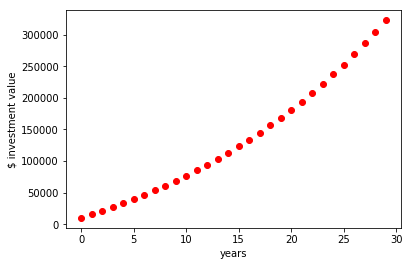

In [29]:
plt.plot(years_arr,investment_value,"ro")
plt.ylabel("$ investment value")
plt.xlabel("years")

Showing everything together....

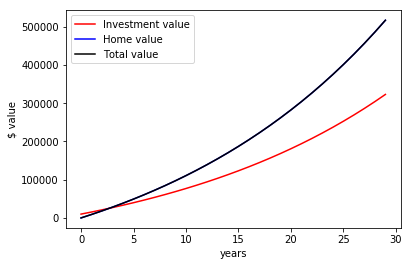

In [32]:
plt.plot(years_arr,investment_value,"r-", label="Investment value")
plt.plot(years_arr,home_equity_value,"b-",label="Home value")
plt.plot(years_arr,home_equity_value,"k-",label="Total value")
plt.ylabel("$ value")
plt.xlabel("years")
plt.legend()